## 数据分析之新闻分类

案例背景

任务与实现

任务扩展

数据集描述



In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "SimHei"   #设置字体
plt.rcParams["axes.unicode_minus"] = False  #字符显示

news = pd.read_csv("news.csv")
print(news.shape)
display(news.head())

#plt（matplotlib.pyplot）使用rc配置文件来自定义图形的各种默认属性，称之为rc配置或rc参数。
#通过rc参数可以修改默认的属性，包括窗体大小、每英寸的点数、线条宽度、颜色、样式、坐标轴、坐标和网络属性、文本、字体等。
#shape函数是numpy.core.fromnumeric中的函数，它的功能是读取矩阵的长度，比如shape[0]就是读取矩阵第一维度的长度。

(20738, 4)


,date,tag,headline,content
0,2016-01-01,详细全文,陆军领导机构火箭军战略支援部队成立大会在京举行 习近平向中国人民解放军陆军火箭军战略支援部队...,中国人民解放军陆军领导机构、中国人民解放军火箭军、中国人民解放军战略支援部队成立大会2015...
1,2016-01-01,详细全文,中央军委印发《关于深化国防和军队改革的意见》,经中央军委主席习近平批准，中央军委近日印发了《关于深化国防和军队改革的意见》。\n《意见》强...
2,2016-01-01,详细全文,《习近平关于严明党的纪律和规矩论述摘编》出版发行,由中共中央纪律检查委员会、中共中央文献研究室编辑的《习近平关于严明党的纪律和规矩论述摘编》一...
3,2016-01-01,详细全文,以实际行动向党中央看齐 向高标准努力,广大党员干部正在积极学习习近平总书记在中央政治局专题民主生活会上的重要讲话。大家纷纷表示要把...
4,2016-01-01,详细全文,【年终特稿】关键之年 改革挺进深水区,刚刚过去的2015年，是全面深化改革的关键之年。改革集中发力在制约经济社会发展的深层次矛盾，...


In [124]:
#检查缺失值，并对缺失值进行处理
news.isnull().sum()
# news.info()

date          0
tag           0
headline      0
content     107
dtype: int64

In [125]:
#内容列存在缺失值，我们使用标题来代替内容
index = news[news["content"].isnull()].index
news["content"][index] = news["headline"][index]
news.isnull().sum()

date        0
tag         0
headline    0
content     0
dtype: int64

In [126]:
news.loc[index].sample(5)  #????

,date,tag,headline,content
3163,2016-06-22,详细全文,习近平出席乌兹别克斯坦总统举行的欢迎仪式,习近平出席乌兹别克斯坦总统举行的欢迎仪式
1181,2016-03-11,详细全文,全国政协十二届四次会议举行第三次全体会议,全国政协十二届四次会议举行第三次全体会议
4150,2016-08-11,国内,“菲鱼”代言 拔罐从里约走红世界,“菲鱼”代言 拔罐从里约走红世界
13309,2017-10-25,详细全文,习近平同志简历,习近平同志简历
2079,2016-04-25,详细全文,俞正声会见全国台湾同胞投资企业联谊会第四届会员代表大会代表,俞正声会见全国台湾同胞投资企业联谊会第四届会员代表大会代表


## 重复值处理
重复的数据，对文本分析与建模没有帮助，我们可以直接删除重复记录。

In [127]:
print(news.duplicated().sum())
display(news[news.duplicated()])

5


,date,tag,headline,content
13280,2017-10-24,详细全文,中国共产党第十九届中央委员会委员名单,中国共产党第十九届中央委员会委员名单
13284,2017-10-24,详细全文,中国共产党第十九届中央委员会候补委员名单,中国共产党第十九届中央委员会候补委员名单
13288,2017-10-24,详细全文,中国共产党第十九届中央纪律检查委员会委员名单,中国共产党第十九届中央纪律检查委员会委员名单
13305,2017-10-25,详细全文,中国共产党第十九届中央委员会第一次全体会议公报,中国共产党第十九届中央委员会第一次全体会议公报
13325,2017-10-25,详细全文,中国共产党第十九届中央纪律检查委员会第一次全体会议公报,中国共产党第十九届中央纪律检查委员会第一次全体会议公报


删除重复的记录，并检测是否删除成功

In [128]:
news.drop_duplicates(inplace=True)
print(news.duplicated().sum())

0


In [129]:
import re

re_obj = re.compile(r"[!\"#$%&'()*+,-./:;<=>?@[\]^_{|}!，。？、…（）：【】《》‘’“”\s]+")

def clear(text):
    return re_obj.sub("",text)

news["content"] = news["content"].apply(clear)
news.sample(5)

,date,tag,headline,content
18318,2018-06-18,国际,尼日利亚东北部爆炸 至少34人死亡,尼日利亚东北部博尔诺州丹博阿镇16日晚先后遭遇自杀式爆炸和手榴弹袭击造成至少34人死亡18人...
8687,2017-03-27,详细全文,【时代先锋】徐立平：勇者无惧 匠心报国,有这样一个岗位要为火箭发动机里危险的火药做整形在这个危险岗位上坚持三十年不失误不出次品需要怎...
14442,2017-12-15,详细全文,习近平会见来京述职的崔世安,国家主席习近平15日下午在中南海瀛台会见了来京述职的澳门特别行政区行政长官崔世安听取了他对澳...
4689,2016-09-08,详细全文,我国光控微流体研究取得领先突破,国际权威期刊自然杂志今天在主刊上发表了中国科学家的一项突破性成果复旦大学的科研团队在世界上首...
2916,2016-06-08,国际,沙特出台经济转型计划摆脱石油依赖,沙特阿拉伯7号出台2020国家经济转型计划旨在摆脱对石油的依赖根据该计划到2020年沙特非石...


## 2.3.4分词
分词是将连续的文本，分隔成语义合理的若干词汇序列。对于英语是比较容易的，对于中文有一定的难度。可以通过Jieba分词，也可以采取其他的方法。

In [130]:
import jieba
s = "今天，外面下了很大的雨"
words = jieba.cut(s)
print(list(words))
words = jieba.lcut(s)
print(words)

['今天', '，', '外面', '下', '了', '很大', '的', '雨']
['今天', '，', '外面', '下', '了', '很大', '的', '雨']


In [131]:
def cut_word(text):
    return jieba.cut(text)

news["content"] = news["content"].apply(cut_word)
news.sample(5)

,date,tag,headline,content
12776,2017-09-29,详细全文,本台将直播党和国家领导人同首都各界向人民英雄敬献花篮仪式,<generator object Tokenizer.cut at 0x0000026B6...
12797,2017-09-30,详细全文,习近平会见美国国务卿,<generator object Tokenizer.cut at 0x0000026B6...
18329,2018-06-19,详细全文,王岐山会见希腊议长,<generator object Tokenizer.cut at 0x0000026B1...
3840,2016-07-26,国内,日本一残疾人疗养院发生伤人事件,<generator object Tokenizer.cut at 0x0000026B0...
16824,2018-04-10,详细全文,全国查处“扫黄打非”案件2600多起,<generator object Tokenizer.cut at 0x0000026B0...


## 2.3.5停用词处理


In [132]:
def get_stopword():
    s = set()
    with open("stopword.txt",encoding="UTF-8") as f:
        for line in f:
            s.add(line.strip())
    return s


def remove_stopword(words):
    return [word for word in words if word not in stopword]


stopword = get_stopword()
news["content"] = news["content"].apply(remove_stopword)
news.sample(5)

,date,tag,headline,content
396,2016-01-25,详细全文,北方气温回升 南方低温持续,"[寒潮, 带来, 强, 降温, 缩小, 北方, 大部分, 地区, 气温, 回升, 南方, 低..."
8350,2017-03-13,详细全文,中共中央举行民主协商会,"[受, 中共中央, 委托, 中共, 中央政治局常委, 全国政协, 主席, 俞正声, 月, 2..."
4362,2016-08-22,国内,巴西警方没收爱尔兰奥委会官员护照,"[继, 兼任, 爱尔兰, 奥委会, 主席, 欧洲, 奥委会, 主席, 国际奥委会, 执委, ..."
5395,2016-10-16,详细全文,习近平对全国脱贫攻坚奖表彰活动作出重要指示强调 万众一心 埋头苦干 切实把精准扶贫精准脱贫落到实处,"[第三个, 国家, 扶贫, 日, 到来之际, 中共中央, 总书记, 国家, 主席, 中央军委..."
11488,2017-08-04,国内,驻澳门部队军营开放活动精彩纷呈,"[月, 日, 驻澳门部队, 珠海, 正岭, 营区, 军营, 开放, 活动, 1500, 多名..."


## 2.4 数据探索
### 2.4.1 类别数量分布

详细全文    11529
国内       6186
国际       3018
Name: tag, dtype: int64


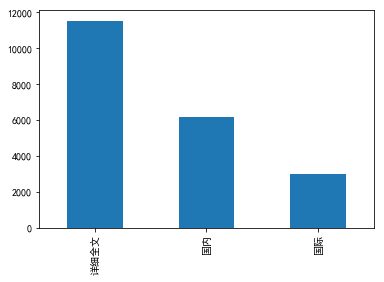

In [133]:
t = news["tag"].value_counts()  #?? value_counts()是一种查看表格某列中有多少个不同值的快捷方法
print(t)
t.plot(kind="bar")

### 2.4.2 年份数量分布

2017    7903
2016    6896
2018    5934
Name: 0, dtype: int64


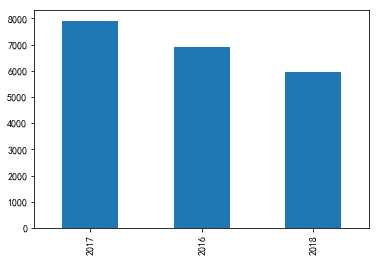

In [134]:
t = news["date"].str.split("-",expand=True)
t2 = t[0].value_counts()
print(t2)
t2.plot(kind="bar")
#t[1].value_counts().plot(kind="bar")
#t[2].value_counts().plot(kind="bar")

## 2.4.3词汇统计
### 2.4.3.1词汇量统计

In [135]:
from itertools import chain
from collections import Counter

li_2d = news["content"].tolist()
# 将二维列表扁平化为一维列表。

li_1d = list(chain.from_iterable(li_2d))
print(f"总词汇量: {len(li_1d)}")
c = Counter(li_1d)
print(f"不重复词汇数量: {len(c)}")
common = c.most_common(15)
print(common)

总词汇量: 2192092
不重复词汇数量: 94502
[('发展', 20414), ('中国', 18785), ('习近平', 13424), ('合作', 12320), ('新', 11666), ('年', 11643), ('国家', 10881), ('日', 10578), ('中', 10531), ('工作', 9328), ('建设', 8331), ('月', 8179), ('经济', 7239), ('主席', 6786), ('推动', 6271)]


## 2.4.3.2 词频统计


<BarContainer object of 15 artists>

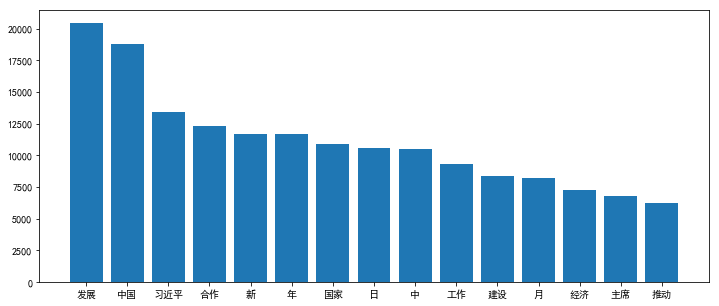

In [136]:
vocabulary,frequency = [],[]
for v, f in common:
    vocabulary.append(v)
    frequency.append(f)
plt.figure(figsize=(12, 5))
plt.bar(vocabulary,frequency)

### 2.4.3.3 百分比统计

['0.93', '0.86', '0.61', '0.56', '0.53', '0.53', '0.50', '0.48', '0.48', '0.43', '0.38', '0.37', '0.33', '0.31', '0.29']


<BarContainer object of 15 artists>

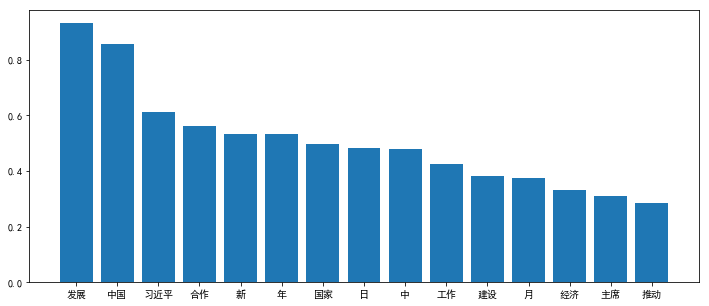

In [137]:
total = len(li_1d)
percentage = [v * 100 / total for v in frequency]
print([f"{v:.2f}" for v in percentage]) # ???
plt.figure(figsize=(12, 5))
plt.bar(vocabulary, percentage)

## 2.4.3.4新闻词汇长度统计

<BarContainer object of 15 artists>

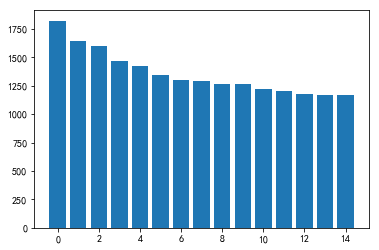

In [138]:
num = [len(li) for li in li_2d]  #???
length = 15
plt.bar(range(length),sorted(num, reverse=True)[:length])

## 2.4.3.5 新闻词汇分布统计

(array([1.7474e+04, 2.7600e+03, 2.9500e+02, 1.0900e+02, 3.9000e+01,
        3.1000e+01, 1.7000e+01, 4.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([1.000e+00, 1.830e+02, 3.650e+02, 5.470e+02, 7.290e+02, 9.110e+02,
        1.093e+03, 1.275e+03, 1.457e+03, 1.639e+03, 1.821e+03]),
 <a list of 10 Patch objects>)

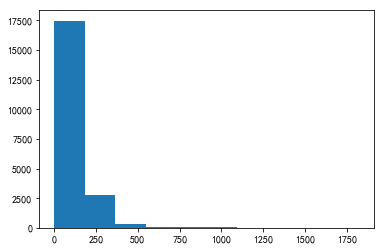

In [139]:
plt.hist(num)

##　2.4.4 生词词云图
Python中，wordcloud模块提供了生成词云图的功能，我们可以使用该模块生成词云图。该模块并非Anaconda默认的模块，需要独立安装后才能使用。

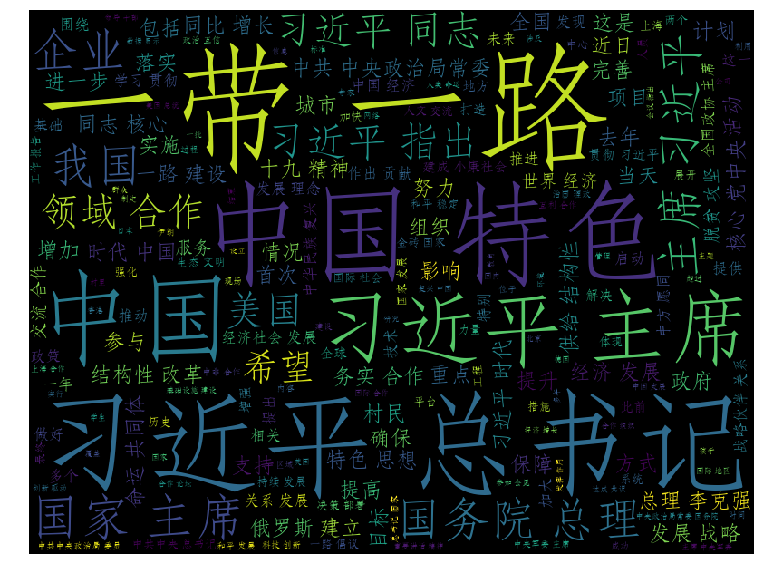

In [140]:
from wordcloud import WordCloud

#需要指定字体的位置，否则中文无法正常显示。
wc = WordCloud(font_path=r"C:/Windows/Fonts/STFANGSO.ttf",width=800,height=600)
li_2d = news["content"].tolist()
li_1d = list(chain.from_iterable(li_2d))
join_words = " ".join(li_1d)
img = wc.generate(join_words)
plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.axis('off')
wc.to_file("wordcloud.png")

## 2.4.4.2自定义背景
还可使用指定的图片作为背景，生成词云图。

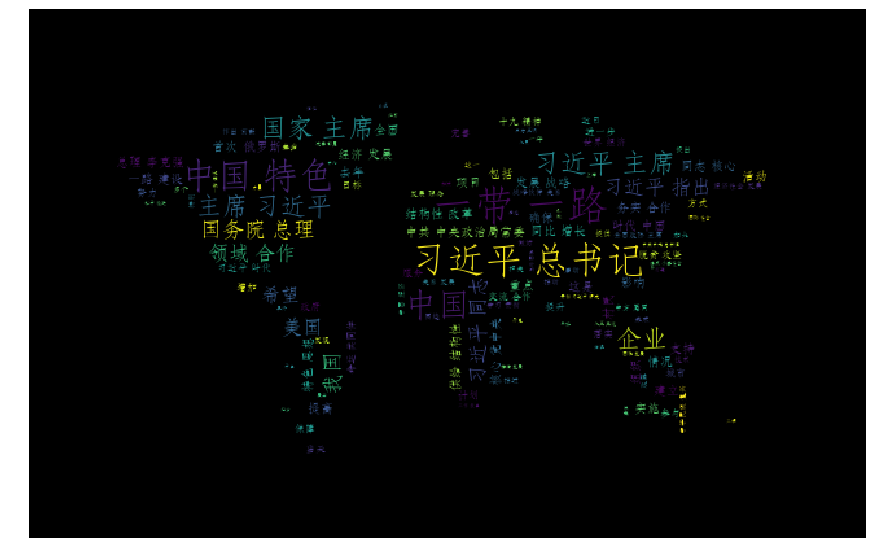

In [141]:
wc = WordCloud(font_path=r"C:/Windows/Fonts/STFANGSO.ttf",mask=plt.imread("background_2.jpg"))
img = wc.generate(join_words)
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
wc.to_file("wordcloud1.png") #把词云图写入文件？？怎么把黑底去掉

## 2.5文本向量化
对文本数据进行建模，有两个问题需要解决：

1.模型进行的是数学运算，因此需要数值类型的数据，而文本不是数值类型数据
2.建模需要结构化数据，而文本是非结构化数据。

将文本转换为数值特征向量，称为**文本向量化**。将文本向量化，可以分为如下步骤：

1.对文本分词，拆分成更容易处理的单词。
2.将单词转换为数值类型，即使用合适的数值来表示每个单词。

同样，需要注意的是，文本是非结构化数据，在向量化过程中，需要将其转换为结构化数据。

## 2.5.1 词袋模型
词袋模型，直观上理解，就是一个装满单词的袋子。实际上，词袋模型是一种能够将文本向量化的方式。在词袋模型中，每个文档为一个样本，每个不重复的单词为一个特征，单词在文档中出现的次数作为特征值。例如，给定如下的文档集：

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()
docs = ["Where there is a will, there is a way.","There is no royal road to learning.",
]
bag = count.fit_transform(docs)
#bag是一个稀疏的矩阵
print(bag)
#调用稀疏矩阵的toarry方法，将稀疏矩阵转换为ndarry对象。
print(bag.toarray())


  (0, 7)	1
  (0, 9)	1
  (0, 0)	2
  (0, 5)	2
  (0, 8)	1
  (1, 1)	1
  (1, 6)	1
  (1, 3)	1
  (1, 4)	1
  (1, 2)	1
  (1, 0)	1
  (1, 5)	1
[[2 0 0 0 0 2 0 1 1 1]
 [1 1 1 1 1 1 1 0 0 0]]


In [143]:
#获取所有的特征（单词名称）。
print(count.get_feature_names())
#输出单词与编号的映射关系。
print(count.vocabulary_)

['is', 'learning', 'no', 'road', 'royal', 'there', 'to', 'way', 'where', 'will']
{'where': 8, 'there': 5, 'is': 0, 'will': 9, 'way': 7, 'no': 2, 'royal': 4, 'road': 3, 'to': 6, 'learning': 1}


经过训练后，**CountVectorizer**就可以对未知文档（训练集外的文档）进行向量化。当然，向量化的特征仅为训练集中出现的单词特征，如果未知文档中的单词不存在训练集，则在词袋模型中无法体现。

In [144]:
test_docs = ["While there is life there is hope.","No pain, no gain."]
t = count.transform(test_docs)
print(t.toarray())

[[2 0 0 0 0 2 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0]]


## 2.5.2 TF-IDF

通过CountVectorizer类，我们能够将文档向量化处理。在向量化过程中，我们使每个文档中单词的频数作为对应特征的取值。这是合理的，因为，单词出现的次数越多，我们就认为该单词理应比出现次数少的单词更加重要。

然而，这是相对的，有些单词，我们不能仅以当前文档中的频数来进行衡量，还要考虑其中在语料库中，其他文档中出现的次数。因为有些单词，确实是非常常见的，其在语料库中所有的文档中，可能都会频繁出现，对于这样的单词，我们就应该降低其重要性。例如，在新闻联播中，“中国”，“发展”等单词，在语料库中出现的频率非常高，因此，即使这些词在某篇文档中频繁出现，也不能说明这些词对当前文档是非常重要的，因此这些词不含有特别有意义的信息。

TF-IDF可以用来调整单词在文档中的权重。其由两部分组成：

1.TF(Term-Frequency)词频，指一个单词在文档中出现的次数。
2.IDF(Inverse Document-Frequency)逆文档频率

其中，IDF的计算方式为：（略）

说明：scikit-learn库中实现的tf-idf转换，与标准的公式略有不同。并且，tf-idf结果会使用L2范数进行规范化处理。


In [147]:
from sklearn.feature_extraction.text import TfidfTransformer

count = CountVectorizer()
docs = ["Where there is a will, there is a way.", "There is no royal road to learning.",
]
bag = count.fit_transform(docs)
tfidf = TfidfTransformer()
t = tfidf.fit_transform(bag)
#TfidfTransformer转换的结果为稀疏矩阵。
print(t.toarray())

[[0.53594084 0.         0.         0.         0.         0.53594084
  0.         0.37662308 0.37662308 0.37662308]
 [0.29017021 0.4078241  0.4078241  0.4078241  0.4078241  0.29017021
  0.4078241  0.         0.         0.        ]]


此外，scikit-learn中，同时提供了一个类TfidfVectorizer，其中以直接将文档转换为TF-IDF值，也就是说，该类相当于集成了CountVectorizer与TFidfTransformer两个类的功能，这对我们实现上提供了便利。

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

docs = ["Where there is a will, there is a way.", "There is no royal road to learning.",
]

tfidf = TfidfVectorizer()
t = tfidf.fit_transform(docs)
print(t.toarray)

<bound method _cs_matrix.toarray of <2x10 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>>


以上结果怎么解释？？？？？？？？？


## 2.6建立模型
### 2.6.1构建训练集与测试集


我们需要将每条新闻的词汇进行整理。目前，我们文本内容已经完成了分词处理，但词汇是以列表类型呈现的，为了方便后续的向量化语建模操作，我们将每条新闻的词汇组合在一起，成为字符串类型，使用空格分隔。

In [148]:
def join(text_list):
    return " ".join(text_list)

news["content"] = news["content"].apply(join)
news.sample(5)

,date,tag,headline,content
10806,2017-06-30,详细全文,国务院办公厅印发《全国深化简政放权放管结合优化服务改革电视电话会议重点任务分工方案》,国务院办公厅 日前 印发 全国 深化 简政放权 放管 优化 服务 改革 电视电话会议 重点 ...
13924,2017-11-23,详细全文,习近平举行仪式欢迎吉布提共和国总统访华,国家 主席 习近平 23 日 下午 人民大会堂 东门外 广场 举行仪式 吉布提共和国 总统 ...
10274,2017-06-04,国内,故宫博物院新增五大研究所,故宫博物院 日前 新增 钟表 宫廷 原状 故宫 文物 南迁 世界 文明古国 影视 五大 研究...
4168,2016-08-12,国内,我国圆满完成首次万米级深渊科考,历时 52 天 航行 我国 4500 米 载人 潜水器 万米 深潜 作业 工作 母船 探索 ...
16091,2018-03-06,国际,美国拟加征钢铝关税 多方反对,美国 威胁 本周 出台 具体措施 进口 钢铁 铝 加征 关税 世界贸易组织 总干事 阿泽 维...


然后，我们需要将标签列（tag列）转换为离散值

In [149]:
news["tag"] = news["tag"].map({"详细全文": 0, "国内":0,"国际": 1})
news["tag"].value_counts()
                               

0    17715
1     3018
Name: tag, dtype: int64

这样，我们就可以来对样本数据进行切分，构建训练题与测试集。

In [150]:
from sklearn.model_selection import train_test_split

X = news["content"]
y = news["tag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("训练集体样本:", y_train.shape[0], "测试集样本数：", y_test.shape[0])

训练集体样本: 15549 测试集样本数： 5184


## 2.6.2实实向量化转换
大家需要注意，到目前为止，数据集X还是文本类型，我们需要对其进行向量化操作。这里，我们使用TfidfVectorizer类，在训练集上进行训练，然后分别对训练集与测试集实实转换。

In [151]:
vec = TfidfVectorizer(min_df=2, ngram_range=(1, 2)) # 为什么n_gram为2，可不可以为3
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)
display(X_train, X_test)

<15549x193116 sparse matrix of type '<class 'numpy.float64'>'
	with 1777193 stored elements in Compressed Sparse Row format>

<5184x193116 sparse matrix of type '<class 'numpy.float64'>'
	with 535206 stored elements in Compressed Sparse Row format>

In [152]:
# X_train.toarray() 会报MemmoryError
X_train.shape[0] * X_train.shape[1] * 8 / (1024 ** 3) ##????

22.372310489416122

## 2.6.3特征选择

使用词袋模型向量化后，会产生过多的特征，这些特征会对存储与计算造成巨大的压力，同时， 并非所有的特征都对建模有帮助，基于以上原因，我们在数据送人模型之前，先进行特征选择。

这里，我们使用方差分析（ANOVA）来进行特征选择，选择与目标分类变量相关的20000个特征。方差分析用来分析来自不同总体的样本均值是否相等，进而可以用来检验分类变量与连续变量之间是否相关。检验方式为，根据分类变量的不同取值，将样本进行分组。首先就是组内差异SSE与组间差异SSM，然后计算：

F = SSM|(C-1)/SSE|(n-c)

??怎么输入公式

其中，n为样本数量，c为类别数量（分组数量）。得出的比值F，服从自由度为（c-1, n-c）的F分布。因此，我们就可以根据该值的大小来判断不同分组均值是否相等。




In [153]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=min(20000, X_train.shape[1]))
selector.fit(X_train, y_train)
X_train = selector.transform(X_train).astype(np.float32) ##?????
X_test = selector.transform(X_test).astype(np.float32)
print(X_train.shape, X_test.shape)

(15549, 20000) (5184, 20000)


## 2.6.4 训练与评估模型
我们使用朴素贝叶斯算法来实现分类与预测。朴素贝叶斯算法是基于概率的分类算法，其前提要求特征之间是独立的，该算法比较简单，实际上使用的就是全概率公式与贝叶斯公式。朴素贝叶斯算法在文本分类场景中是非常合适的。

### 2.6.4.1 全概率公式与贝叶斯公式
### 全概率公式
设实验E的样本空间为S，A为E的事件，B1，B2，…,Bn为S的一个划分且P（Bi）> 0(i = 1,2,…n)，则
P(A) = P(A|B1)P(B1) +Ｐ（A|B2）P(B2)+……+P（A|Bn）P(Bn)

贝叶斯公式
设实验E的样本空间为S，A为E的事件，B1，B2，……，Bn为S的一个划分，且P（A）> 0,P(Bi) >0(i = 1,2,…，n)，则：

## 2.6.4.2 贝叶斯公式示例


In [154]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

X_train = X_train.toarray()
X_test = X_test.toarray()
nb = GaussianNB()
nb.fit(X_train, y_train)
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))
print(classification_report(y_test, nb.predict(X_test)))

0.9634703196347032
0.9014274691358025
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      4408
           1       0.63      0.81      0.71       776

    accuracy                           0.90      5184
   macro avg       0.80      0.86      0.83      5184
weighted avg       0.92      0.90      0.91      5184

